In [24]:
import sys
import scanpy as sc
import pandas as pd
from cnmf import cNMF
import numpy as np
import tqdm as tqdm
import gseapy as gp
from tqdm.auto import tqdm

In [9]:
spectra_scores = pd.read_csv('ml_program/program22.csv')

In [25]:
save_path = 'p22_data/'

/hpc/home/zy231/.local/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


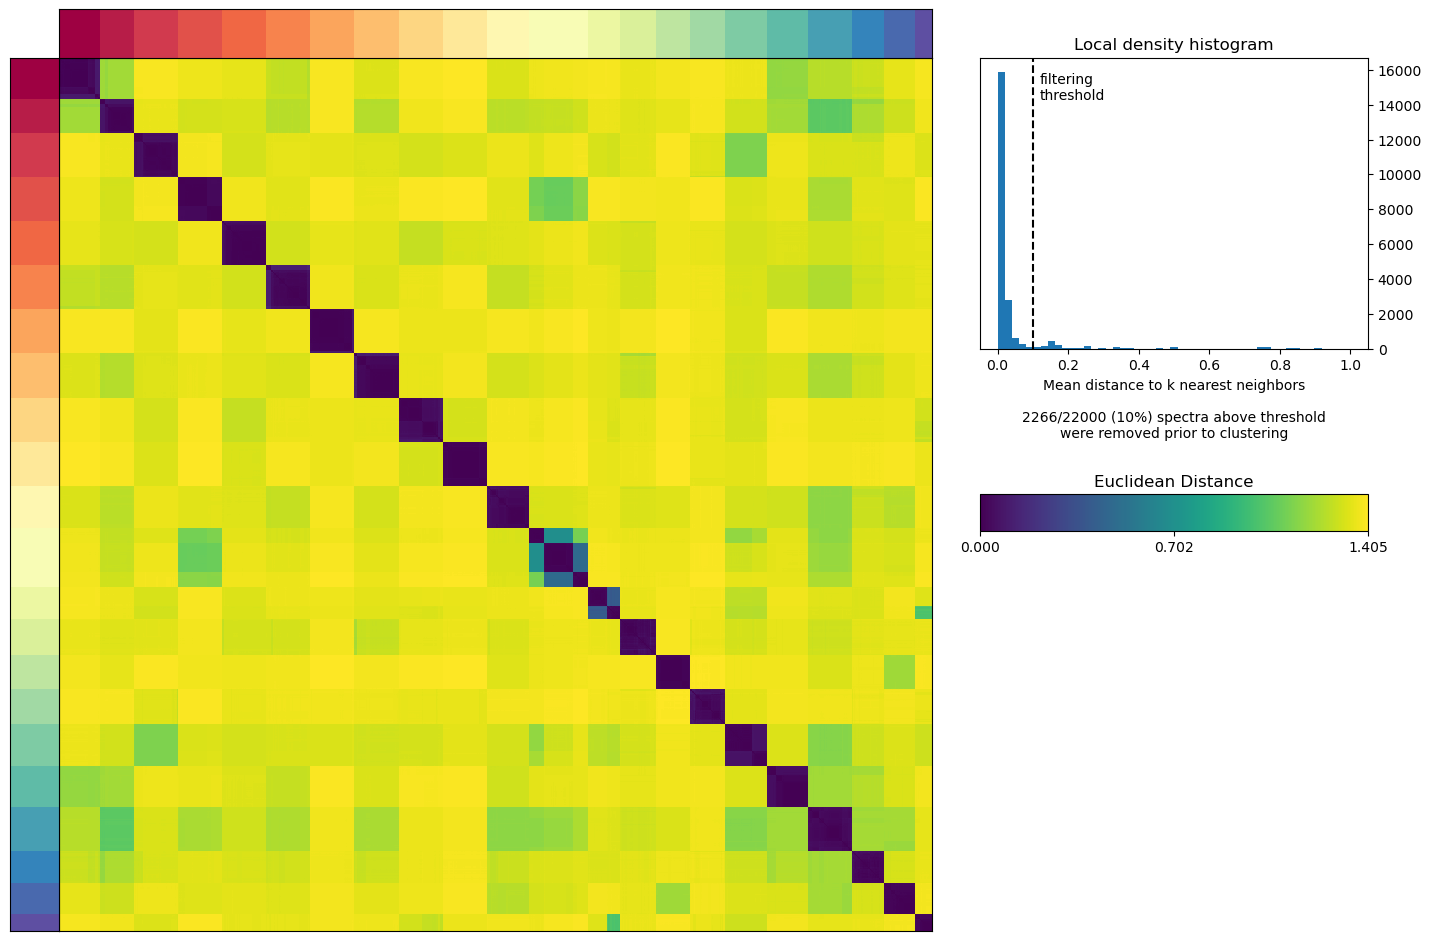

In [13]:
cnmf_obj = cNMF(output_dir="ml_program/adatafinal22", name="k22run")
cnmf_obj.consensus(k=22, density_threshold=0.1)
usage, spectra_scores, spectra_tpm, top_genes = cnmf_obj.load_results(K=22, density_threshold=0.1)

In [26]:
my_program = 22

all_gsea_results = {}
gene_sets_db = "GO_Biological_Process_2023"
#gene_sets_db = "KEGG_2021_Human"
#gene_sets_db = 'MSigDB_Hallmark_2020'

#gene_set_name = 'hallmark'
#gene_set_name = 'KEGG'
gene_set_name = 'GO'


In [ ]:
for i in tqdm(range(1,my_program+1)):
    print(f"\n--- Running Program {i} of {my_program} ---")
        
    # 1. Get the ranked list for program 'i'
    program_ranked_list = spectra_scores[i].sort_values(ascending=False)
        
    # 2. Format it for gseapy
    prerank_df = pd.DataFrame(program_ranked_list)
    prerank_df.reset_index(inplace=True)
    prerank_df.columns = ['gene', 'score']
        
    # 3. Run Prerank
    try:
        prerank_results = gp.prerank(
            rnk=prerank_df,
            gene_sets=gene_sets_db,
            min_size=15,
            max_size=500,
            threads = -1,
            permutations = 1000,
            outdir=None,
            seed = 6,
            verbose = True,
        )
            
            # 4. Store the results in our dictionary
        if not prerank_results.res2d.empty:
            print(f"Program {i} - Top hit: {prerank_results.res2d.iloc[0]['Term']}")
            all_gsea_results[i] = prerank_results.res2d
        else:
            print(f"Program {i} - No significant pathways found.")
                
    except Exception as e:
        print(f"Error processing Program {i}: {e}")
    
print("Looping through results dictionary to build summary table...")


  0%|          | 0/22 [00:00<?, ?it/s]

2026-02-16 23:24:15,720 [WARNING] Duplicated values found in preranked stats: 27.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2026-02-16 23:24:15,722 [INFO] Parsing data files for GSEA.............................
2026-02-16 23:24:15,780 [INFO] Enrichr library gene sets already downloaded in: /hpc/home/zy231/.cache/gseapy, use local file



--- Running Program 1 of 22 ---


2026-02-16 23:24:15,970 [INFO] 2695 gene_sets have been filtered out when max_size=500 and min_size=15
2026-02-16 23:24:15,973 [INFO] 2712 gene_sets used for further statistical testing.....
2026-02-16 23:24:15,974 [INFO] Start to run GSEA...Might take a while..................
2026-02-16 23:34:08,322 [INFO] Congratulations. GSEApy runs successfully................

2026-02-16 23:34:08,476 [WARNING] Duplicated values found in preranked stats: 27.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2026-02-16 23:34:08,477 [INFO] Parsing data files for GSEA.............................
2026-02-16 23:34:08,553 [INFO] Enrichr library gene sets already downloaded in: /hpc/home/zy231/.cache/gseapy, use local file


Program 1 - Top hit: Translation (GO:0006412)

--- Running Program 2 of 22 ---


2026-02-16 23:34:08,655 [INFO] 2695 gene_sets have been filtered out when max_size=500 and min_size=15
2026-02-16 23:34:08,658 [INFO] 2712 gene_sets used for further statistical testing.....
2026-02-16 23:34:08,660 [INFO] Start to run GSEA...Might take a while..................
2026-02-16 23:43:59,648 [INFO] Congratulations. GSEApy runs successfully................

2026-02-16 23:44:00,715 [WARNING] Duplicated values found in preranked stats: 27.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2026-02-16 23:44:00,716 [INFO] Parsing data files for GSEA.............................
2026-02-16 23:44:00,772 [INFO] Enrichr library gene sets already downloaded in: /hpc/home/zy231/.cache/gseapy, use local file


Program 2 - Top hit: Cytoplasmic Translation (GO:0002181)

--- Running Program 3 of 22 ---


2026-02-16 23:44:01,565 [INFO] 2695 gene_sets have been filtered out when max_size=500 and min_size=15
2026-02-16 23:44:01,567 [INFO] 2712 gene_sets used for further statistical testing.....
2026-02-16 23:44:01,568 [INFO] Start to run GSEA...Might take a while..................
2026-02-16 23:53:53,093 [INFO] Congratulations. GSEApy runs successfully................

2026-02-16 23:53:54,176 [WARNING] Duplicated values found in preranked stats: 27.11% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2026-02-16 23:53:54,177 [INFO] Parsing data files for GSEA.............................
2026-02-16 23:53:54,245 [INFO] Enrichr library gene sets already downloaded in: /hpc/home/zy231/.cache/gseapy, use local file


Program 3 - Top hit: Regulation Of Blood Circulation (GO:1903522)

--- Running Program 4 of 22 ---


2026-02-16 23:53:54,366 [INFO] 2695 gene_sets have been filtered out when max_size=500 and min_size=15
2026-02-16 23:53:54,370 [INFO] 2712 gene_sets used for further statistical testing.....
2026-02-16 23:53:54,371 [INFO] Start to run GSEA...Might take a while..................
2026-02-17 00:03:44,641 [INFO] Congratulations. GSEApy runs successfully................

2026-02-17 00:03:45,654 [WARNING] Duplicated values found in preranked stats: 27.11% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2026-02-17 00:03:45,655 [INFO] Parsing data files for GSEA.............................
2026-02-17 00:03:45,715 [INFO] Enrichr library gene sets already downloaded in: /hpc/home/zy231/.cache/gseapy, use local file


Program 4 - Top hit: Heart Contraction (GO:0060047)

--- Running Program 5 of 22 ---


2026-02-17 00:03:46,757 [INFO] 2695 gene_sets have been filtered out when max_size=500 and min_size=15
2026-02-17 00:03:46,760 [INFO] 2712 gene_sets used for further statistical testing.....


In [ ]:
# ... [Your existing loop code above remains exactly the same] ...

print("\n\n✅ GSEA complete for all programs!")

# --- NEW AGGREGATION LOGIC STARTS HERE ---

t5_pathways_list = []
fdr25_pathways_list = []
fdr5_pathways_list = []

# Iterate through the dictionary containing results for all 46 programs
for program_name, results_df in all_gsea_results.items():
    
    # Check if the dataframe is empty
    if results_df.empty:
        continue
    
    sorted_df = results_df.sort_values(by='NES', ascending=False)

    top_5 = results_df.sort_values(by = 'FDR q-val', ascending = True).head(5)
    fdr25 = sorted_df[sorted_df['FDR q-val'] <= 0.25]
    fdr5 = sorted_df[sorted_df['FDR q-val'] <= 0.05]
    
    # 3. Add a column so we know which program these belong to
    top_5.insert(0, 'Program_ID', program_name)
    fdr25.insert(0, 'Program_ID', program_name)
    fdr5.insert(0, 'Program_ID', program_name)
    
    # 4. Append to our list
    t5_pathways_list.append(top_5) 
    fdr25_pathways_list.append(fdr25)
    fdr5_pathways_list.append(fdr5)

# 5. Combine all into one main DataFrame
t5_summary = pd.concat(t5_pathways_list, ignore_index=True)
fdr25_summary = pd.concat(fdr25_pathways_list, ignore_index=True)
fdr5_summary = pd.concat(fdr5_pathways_list, ignore_index=True)

print("Saving summary DataFrame to CSV...")
t5_summary.to_csv(save_path + gene_set_name + '_t5_gsea.csv', index=False)
fdr25_summary.to_csv(save_path + gene_set_name +'_f25_gsea.csv', index=False)
fdr5_summary.to_csv(save_path + gene_set_name +'_f5_gsea.csv', index=False)